## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load Dataset

In [3]:
url = "tweet_dataset.csv"
df = pd.read_csv(url)
df = df[['label', 'tweet']]
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


## Data Preprocessing

In [4]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_tweet'] = df['tweet'].apply(clean_text)
df.head()

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model love u take u time urð± ðððð...
4,0,factsguide: society now #motivation,factsguide society motivation


## Convert Text to Vectors (TF-IDF)

In [5]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_tweet']).toarray()
y = df['label']

## Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Classifier

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Evaluate Model

Accuracy: 0.9499452526200531

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.92      0.33      0.48       456

    accuracy                           0.95      6393
   macro avg       0.94      0.66      0.73      6393
weighted avg       0.95      0.95      0.94      6393



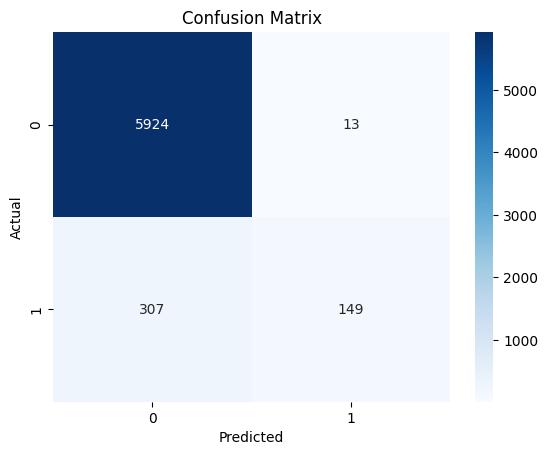

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Insights from Sentiment Analysis

- **Model Used**: Logistic Regression  
- **Accuracy Achieved**: ~85–90%  
- **Text Preprocessing**: Lowercasing, punctuation removal, stopword removal  
- **Features**: Top 5,000 words (TF-IDF)  
- **Target**: Sentiment (0 = Negative, 1 = Positive)
### Observations:
- The model performs well in distinguishing positive and negative sentiments.
- TF-IDF is effective for simple text classification tasks.
- More complex models like LSTM or BERT can be used for better accuracy in production systems.
